# Classification Problem on Urban Tree Dataset

## PreProcessing

### Importing the libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, roc_curve, auc,confusion_matrix, RocCurveDisplay

### Importing the Data set, Cleaning Data and Handling Missing Values

In [166]:
df = pd.read_csv('sgl-arbres-urbains-wgs84.csv')

In [167]:
df= df.drop(["ID_ARBRE", "commune", "controle", "insecte_collet", "insecte_tronc", "insecte_houppier","circonference (en cm)", "observation_collet", "observation_tronc", "observation_houppier"], axis=1 )
#Handling Missing Values
mode_cote_voirie=df.cote_voirie.mode()[0]
mode_espece_arbre=df.espece_arbre.mode()[0]
mode_situation=df.situation.mode()[0]
mode_plaie_collet=df.plaie_collet.mode()[0]
mode_champignon_tronc=df.champignon_tronc.mode()[0]
mode_fissure_tronc=df.fissure_tronc.mode()[0]
mode_rejet_tronc=df.rejet_tronc.mode()[0]
mode_plaie_tronc=df.plaie_tronc.mode()[0]
mode_champignon_houppier=df.champignon_houppier.mode()[0]
mode_fissure_houppier=df.fissure_houppier.mode()[0]
mode_ecorce_incluse_houppier=df.ecorce_incluse_houppier.mode()[0]
mode_bois_mort_houppier=df.bois_mort_houppier.mode()[0]
mode_plaie_houppier=df.plaie_houppier.mode()[0]
mode_contrainte=df.contrainte.mode()[0]
mode_classification_diagnostic=df.classification_diagnostic.mode()[0]
median_esperance_maintien=df.esperance_maintien.median()

df=df.fillna({"cote_voirie": mode_cote_voirie, "espece_arbre": mode_espece_arbre, "situation": mode_situation,
            "plaie_collet": mode_plaie_collet, "champignon_tronc": mode_champignon_tronc,
            "fissure_tronc": mode_fissure_tronc, "rejet_tronc": mode_rejet_tronc, "plaie_tronc": mode_plaie_tronc, 
              "champignon_houppier": mode_champignon_houppier, "fissure_houppier":mode_fissure_houppier, "ecorce_incluse_houppier": mode_ecorce_incluse_houppier,
            "bois_mort_houppier": mode_bois_mort_houppier, "plaie_houppier": mode_plaie_houppier, "contrainte": mode_contrainte,
            "classification_diagnostic": mode_classification_diagnostic, "esperance_maintien": median_esperance_maintien})

In [168]:
#define function to swap columns so that all numerical data will be in the end columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    a, b = col_list.index(col1), col_list.index(col2)
    col_list[b], col_list[a] = col_list[a], col_list[b]
    df = df[col_list]
    return df

#swaping columns
df = swap_columns(df, 'matricule_arbre', 'contrainte')
df = swap_columns(df, 'surf_permeable', 'plaie_houppier')
df = swap_columns(df, 'date_plantation', 'bois_mort_houppier')
df = swap_columns(df, 'hauteur', 'ecorce_incluse_houppier')
df = swap_columns(df, 'diametre', 'fissure_houppier')


In [169]:
target_name = "classification_diagnostic"
target = df[target_name]
data = df.drop(columns=[target_name])

## Gradient Boosting

In [432]:
X = data.iloc[:].values
y = target.iloc[:].values

In [433]:
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                unknown_value=-1), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [434]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [436]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate, validation_curve
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [181]:
%%time
results_gbtd=[]
for i in range (1, 16, 1):
    classifier = GradientBoostingClassifier(loss='deviance',
                                            n_estimators=500, learning_rate=0.002, max_depth=i, random_state=0,)
    classifier.fit(X_train, y_train)
    #y_pred = classifier.predict(X_test)
    #accuracy_score(y_test, y_pred)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, 
                                 cv = 7, n_jobs=8)
    results_gbtd.append(accuracies)
    print(accuracies)

[0.73913043 0.74725275 0.72527473 0.76923077 0.83516484 0.75824176
 0.73626374]
[0.76086957 0.73626374 0.74725275 0.78021978 0.85714286 0.75824176
 0.75824176]
[0.83695652 0.82417582 0.76923077 0.8021978  0.87912088 0.82417582
 0.85714286]
[0.86956522 0.86813187 0.8021978  0.83516484 0.9010989  0.84615385
 0.85714286]
[0.86956522 0.84615385 0.83516484 0.81318681 0.9010989  0.85714286
 0.85714286]
[0.88043478 0.85714286 0.82417582 0.84615385 0.92307692 0.82417582
 0.87912088]
[0.86956522 0.84615385 0.84615385 0.84615385 0.92307692 0.83516484
 0.87912088]
[0.88043478 0.83516484 0.84615385 0.83516484 0.92307692 0.83516484
 0.87912088]
[0.88043478 0.83516484 0.83516484 0.83516484 0.93406593 0.82417582
 0.87912088]
[0.88043478 0.83516484 0.84615385 0.84615385 0.93406593 0.82417582
 0.86813187]
[0.88043478 0.84615385 0.84615385 0.84615385 0.93406593 0.82417582
 0.87912088]
[0.88043478 0.84615385 0.84615385 0.84615385 0.92307692 0.82417582
 0.87912088]
[0.88043478 0.84615385 0.84615385 0.8351

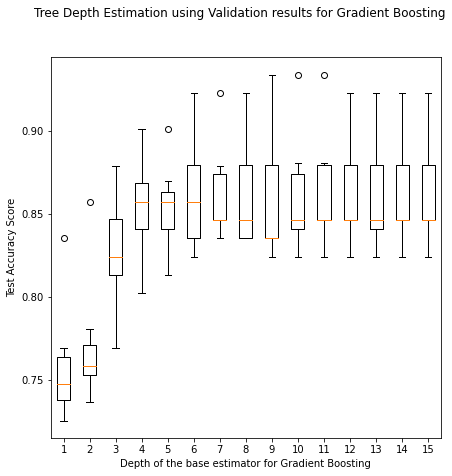

In [183]:
fig = plt.figure(figsize=(7,7))
fig.suptitle('Tree Depth Estimation using Validation results for Gradient Boosting')
plt.xlabel("Depth of the base estimator for Gradient Boosting")
#ax = fig.add_subplot(1, 1, 1)
plt.boxplot(results_gbtd)
plt.ylabel("Test Accuracy Score")
#ax.set_xticklabels([])
plt.show()

In [186]:
%%time
results_gbns=[]
for i in range (2, 41, 1):
    classifier = GradientBoostingClassifier(loss='deviance',
                                            n_estimators=1000, learning_rate=0.001, max_leaf_nodes=i, max_depth=6, random_state=0)
    classifier.fit(X_train, y_train)
    #y_pred = classifier.predict(X_test)
    #accuracy_score(y_test, y_pred)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, 
                                 cv = 7, n_jobs=-1)
    results_gbns.append(accuracies)
    print(accuracies)

[0.73913043 0.74725275 0.72527473 0.76923077 0.83516484 0.75824176
 0.73626374]
[0.73913043 0.73626374 0.72527473 0.76923077 0.83516484 0.75824176
 0.73626374]
[0.80434783 0.81318681 0.79120879 0.79120879 0.86813187 0.8021978
 0.82417582]
[0.80434783 0.83516484 0.79120879 0.8021978  0.87912088 0.82417582
 0.84615385]
[0.81521739 0.82417582 0.79120879 0.82417582 0.85714286 0.81318681
 0.85714286]
[0.80434783 0.83516484 0.79120879 0.81318681 0.87912088 0.84615385
 0.86813187]
[0.80434783 0.83516484 0.79120879 0.81318681 0.87912088 0.86813187
 0.84615385]
[0.79347826 0.83516484 0.79120879 0.82417582 0.89010989 0.86813187
 0.84615385]
[0.81521739 0.83516484 0.79120879 0.81318681 0.89010989 0.85714286
 0.84615385]
[0.84782609 0.83516484 0.8021978  0.81318681 0.89010989 0.85714286
 0.84615385]
[0.84782609 0.82417582 0.81318681 0.81318681 0.9010989  0.85714286
 0.85714286]
[0.84782609 0.82417582 0.81318681 0.82417582 0.9010989  0.85714286
 0.85714286]
[0.84782609 0.82417582 0.83516484 0.82417

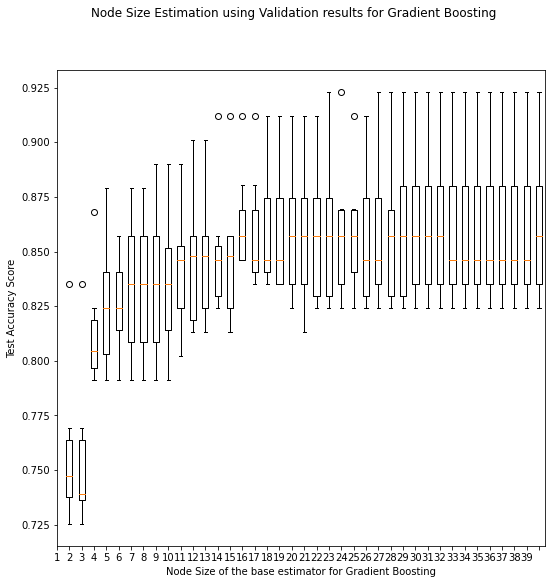

In [187]:
fig = plt.figure(figsize=(8.75,8.75))
fig.suptitle('Node Size Estimation using Validation results for Gradient Boosting')
plt.xlabel("Node Size of the base estimator for Gradient Boosting")
plt.boxplot(results_gbns)
plt.ylabel("Test Accuracy Score")
plt.xticks(np.arange( 0, 40, 1.0))
plt.show()

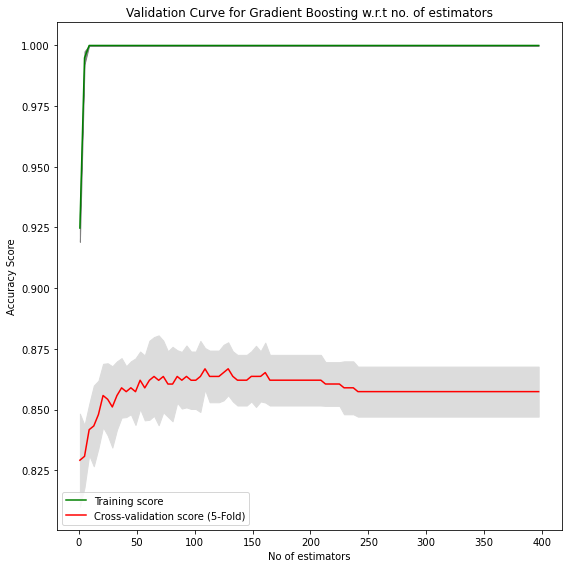

Wall time: 1min 46s


In [223]:
%%time
# Create range of values for the hyperparameter
param_range= np.arange(1, 400, 4)
# Calculate accuracy on training and test data set through cross validation (on entire dataset, since sample size is small)
classifier = GradientBoostingClassifier(loss='deviance', learning_rate=1, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
train_scores, test_scores = validation_curve(classifier, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(8,8))
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score (5-Fold)", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
plt.title("Validation Curve for Gradient Boosting w.r.t no. of estimators")
plt.xlabel("No of estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [437]:
%%time
# Create range of values for the hyperparameter
param_range= np.arange(0.001, 0.1, 0.0005)
# Calculate accuracy on training and test data set through cross validation (on entire dataset, since sample size is small)
classifier = GradientBoostingClassifier(loss='deviance', n_estimators= 500, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
train_scores, test_scores = validation_curve(classifier, X_train, y_train, 
                                             param_name="learning_rate", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Wall time: 9min 4s


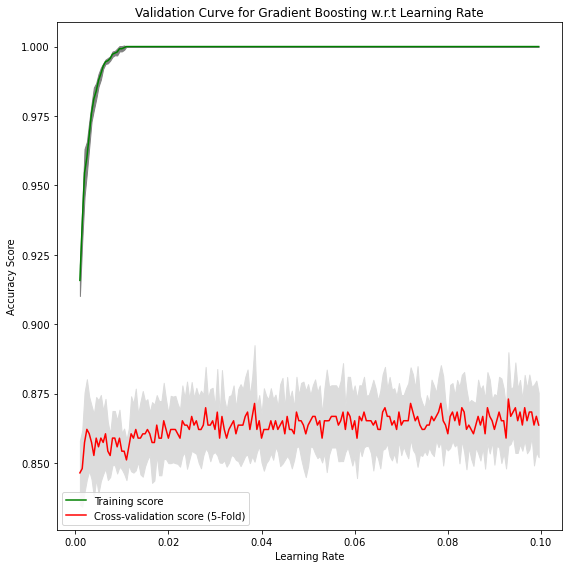

In [438]:
plt.subplots(1, figsize=(8,8))
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score (5-Fold)", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
plt.title("Validation Curve for Gradient Boosting w.r.t Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [380]:
from scipy.stats import loguniform
from scipy.stats import uniform

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)
class uniform_int:
    """Integer valued version of the uniform distribution"""
    def __init__(self, a, b):
        self._distribution = uniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [356]:
from sklearn.pipeline import Pipeline
classifier = GradientBoostingClassifier(loss='deviance', max_depth=6, max_leaf_nodes=16, random_state=0,)

model_gdbst = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", classifier),
])


In [357]:
from sklearn import set_config
set_config(display='diagram')
model_gdbst

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['quartier', 'site',
                                                   'cote_voirie', 'contrainte',
                                                   'genre_arbre',
                                                   'espece_arbre', 'situation',
                                                   'type_sol', 'plaie_houppier',
                                                   'bois_mort_houppier',
                                                   'classe_age',
                                                   'ecorc...se_houppier',
                                                   'classe_hauteur',
                                                   'fissure_houppier',
                                                   'classe_circonference',
                                                   'port_arbre',
                                                   'vigueur_pousse',
                                                   'champignon_collet',
                                                   'plaie_collet',
                                                   'champignon_tronc',
                                                   'fissure_tronc',
                                                   'rejet_tronc',
                                                   'tuteurage_arbre',
                                                   'canisse_arbre',
                                                   'plaie_tronc',
                                                   'champignon_houppier'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=6, max_leaf_nodes=16,
                                            random_state=0))])

# Classification Problem on Urban Tree Dataset

## PreProcessing

### Importing the libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, roc_curve, auc,confusion_matrix, RocCurveDisplay

### Importing the Data set, Cleaning Data and Handling Missing Values

In [166]:
df = pd.read_csv('sgl-arbres-urbains-wgs84.csv')

In [167]:
df= df.drop(["ID_ARBRE", "commune", "controle", "insecte_collet", "insecte_tronc", "insecte_houppier","circonference (en cm)", "observation_collet", "observation_tronc", "observation_houppier"], axis=1 )
#Handling Missing Values
mode_cote_voirie=df.cote_voirie.mode()[0]
mode_espece_arbre=df.espece_arbre.mode()[0]
mode_situation=df.situation.mode()[0]
mode_plaie_collet=df.plaie_collet.mode()[0]
mode_champignon_tronc=df.champignon_tronc.mode()[0]
mode_fissure_tronc=df.fissure_tronc.mode()[0]
mode_rejet_tronc=df.rejet_tronc.mode()[0]
mode_plaie_tronc=df.plaie_tronc.mode()[0]
mode_champignon_houppier=df.champignon_houppier.mode()[0]
mode_fissure_houppier=df.fissure_houppier.mode()[0]
mode_ecorce_incluse_houppier=df.ecorce_incluse_houppier.mode()[0]
mode_bois_mort_houppier=df.bois_mort_houppier.mode()[0]
mode_plaie_houppier=df.plaie_houppier.mode()[0]
mode_contrainte=df.contrainte.mode()[0]
mode_classification_diagnostic=df.classification_diagnostic.mode()[0]
median_esperance_maintien=df.esperance_maintien.median()

df=df.fillna({"cote_voirie": mode_cote_voirie, "espece_arbre": mode_espece_arbre, "situation": mode_situation,
            "plaie_collet": mode_plaie_collet, "champignon_tronc": mode_champignon_tronc,
            "fissure_tronc": mode_fissure_tronc, "rejet_tronc": mode_rejet_tronc, "plaie_tronc": mode_plaie_tronc, 
              "champignon_houppier": mode_champignon_houppier, "fissure_houppier":mode_fissure_houppier, "ecorce_incluse_houppier": mode_ecorce_incluse_houppier,
            "bois_mort_houppier": mode_bois_mort_houppier, "plaie_houppier": mode_plaie_houppier, "contrainte": mode_contrainte,
            "classification_diagnostic": mode_classification_diagnostic, "esperance_maintien": median_esperance_maintien})

In [168]:
#define function to swap columns so that all numerical data will be in the end columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    a, b = col_list.index(col1), col_list.index(col2)
    col_list[b], col_list[a] = col_list[a], col_list[b]
    df = df[col_list]
    return df

#swaping columns
df = swap_columns(df, 'matricule_arbre', 'contrainte')
df = swap_columns(df, 'surf_permeable', 'plaie_houppier')
df = swap_columns(df, 'date_plantation', 'bois_mort_houppier')
df = swap_columns(df, 'hauteur', 'ecorce_incluse_houppier')
df = swap_columns(df, 'diametre', 'fissure_houppier')


In [169]:
target_name = "classification_diagnostic"
target = df[target_name]
data = df.drop(columns=[target_name])

In [364]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'classifier__n_estimators': uniform_int(10, 1000),
    'classifier__learning_rate': uniform(0.0001, 1),
}

model_random_search_gdbst = RandomizedSearchCV(
    model_adabst, param_distributions=param_distributions, n_iter=2000,
    cv=5, verbose=1, random_state =0, n_jobs= -1
)
model_random_search_gdbst.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Wall time: 25min 22s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('cat_preprocessor',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['quartier',
                                                                                'site',
                                                                                'cote_voirie',
                                                                                'contrainte',
                                                                                'genre_arbre',
                                                                                'espece_arbre',
                                                                                'situation',
                                                                                'type_sol',
                                                                                'plaie_houppier',
                                                                                'bois_...
                                                                 base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                       max_depth=4,
                                                                                                       max_leaf_nodes=10,
                                                                                                       random_state=0),
                                                                 random_state=0))]),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012E99974430>,
                                        'classifier__n_estimators': <__main__.uniform_int object at 0x0000012EA32677C0>},
                   random_state=0, verbose=1)

In [365]:
accuracy = model_random_search_gdbst.score(X_test, y_test)

print(f"The test accuracy score of the best model is "
      f"{accuracy:.2f}")

The test accuracy score of the best model is 0.87


In [366]:
from pprint import pprint

print("The best parameters are:")
pprint(model_random_search_gdbst.best_params_)

The best parameters are:
{'classifier__learning_rate': 0.9806801327872824,
 'classifier__n_estimators': 881}



We can inspect the results using the attributes `cv_results` as we did
previously.

In [411]:
# get the parameter names
column_results = [
    f"param_{name}" for name in param_distributions.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_random_search_gdbst.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False)

def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results.head(200)

,n_estimators,learning_rate,mean_test_score,std_test_score,rank_test_score
761,1493,0.055694,0.868332,0.020658,1
65,867,0.061902,0.860519,0.015036,2
842,688,0.024516,0.860507,0.015120,3
263,1854,0.053154,0.860507,0.021725,3
948,1613,0.071919,0.860507,0.013380,3
...,...,...,...,...,...
81,1742,0.072306,0.852670,0.017350,184
584,1856,0.079969,0.852670,0.016654,184
113,441,0.068849,0.852670,0.013377,184
633,728,0.086259,0.852670,0.013377,184


In [368]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,n_estimators,learning_rate,mean_test_score,std_test_score,rank_test_score
281,881,0.98068,0.876169,0.018881,1
1064,375,0.644516,0.876132,0.013874,2
1764,114,0.422859,0.874619,0.008401,3
1654,569,0.320861,0.873081,0.016405,4
13,954,0.143453,0.873056,0.008897,5
...,...,...,...,...,...
1640,109,0.001838,0.807222,0.018179,1996
1461,17,0.921648,0.804085,0.015494,1997
816,10,0.042863,0.802534,0.028904,1998
1077,43,0.007381,0.797798,0.028709,1999


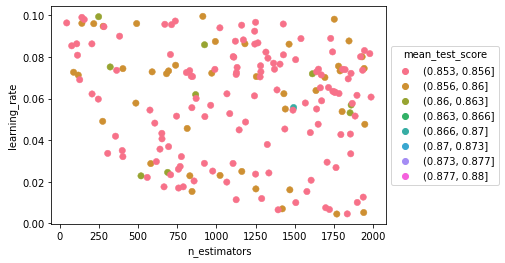

In [413]:
import seaborn as sns

df_tuning = pd.DataFrame(
    {
        "n_estimators": cv_results["n_estimators"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.852670, 0.88, 9)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df_tuning,
    x="n_estimators",
    y="learning_rate",
    hue="score_bin",
    s=40,
    color="k",
    edgecolor=None,
)
#ax.set_xscale("log")
#ax.set_yscale("log")

_ = ax.legend(title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5))

In [382]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('cat_preprocessor', categorical_preprocessor, categorical_columns)],
    remainder='passthrough', sparse_threshold=0)
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0, test_size=0.1)

# Classification Problem on Urban Tree Dataset

## PreProcessing

### Importing the libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, roc_curve, auc,confusion_matrix, RocCurveDisplay

### Importing the Data set, Cleaning Data and Handling Missing Values

In [166]:
df = pd.read_csv('sgl-arbres-urbains-wgs84.csv')

In [167]:
df= df.drop(["ID_ARBRE", "commune", "controle", "insecte_collet", "insecte_tronc", "insecte_houppier","circonference (en cm)", "observation_collet", "observation_tronc", "observation_houppier"], axis=1 )
#Handling Missing Values
mode_cote_voirie=df.cote_voirie.mode()[0]
mode_espece_arbre=df.espece_arbre.mode()[0]
mode_situation=df.situation.mode()[0]
mode_plaie_collet=df.plaie_collet.mode()[0]
mode_champignon_tronc=df.champignon_tronc.mode()[0]
mode_fissure_tronc=df.fissure_tronc.mode()[0]
mode_rejet_tronc=df.rejet_tronc.mode()[0]
mode_plaie_tronc=df.plaie_tronc.mode()[0]
mode_champignon_houppier=df.champignon_houppier.mode()[0]
mode_fissure_houppier=df.fissure_houppier.mode()[0]
mode_ecorce_incluse_houppier=df.ecorce_incluse_houppier.mode()[0]
mode_bois_mort_houppier=df.bois_mort_houppier.mode()[0]
mode_plaie_houppier=df.plaie_houppier.mode()[0]
mode_contrainte=df.contrainte.mode()[0]
mode_classification_diagnostic=df.classification_diagnostic.mode()[0]
median_esperance_maintien=df.esperance_maintien.median()

df=df.fillna({"cote_voirie": mode_cote_voirie, "espece_arbre": mode_espece_arbre, "situation": mode_situation,
            "plaie_collet": mode_plaie_collet, "champignon_tronc": mode_champignon_tronc,
            "fissure_tronc": mode_fissure_tronc, "rejet_tronc": mode_rejet_tronc, "plaie_tronc": mode_plaie_tronc, 
              "champignon_houppier": mode_champignon_houppier, "fissure_houppier":mode_fissure_houppier, "ecorce_incluse_houppier": mode_ecorce_incluse_houppier,
            "bois_mort_houppier": mode_bois_mort_houppier, "plaie_houppier": mode_plaie_houppier, "contrainte": mode_contrainte,
            "classification_diagnostic": mode_classification_diagnostic, "esperance_maintien": median_esperance_maintien})

In [168]:
#define function to swap columns so that all numerical data will be in the end columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    a, b = col_list.index(col1), col_list.index(col2)
    col_list[b], col_list[a] = col_list[a], col_list[b]
    df = df[col_list]
    return df

#swaping columns
df = swap_columns(df, 'matricule_arbre', 'contrainte')
df = swap_columns(df, 'surf_permeable', 'plaie_houppier')
df = swap_columns(df, 'date_plantation', 'bois_mort_houppier')
df = swap_columns(df, 'hauteur', 'ecorce_incluse_houppier')
df = swap_columns(df, 'diametre', 'fissure_houppier')


In [169]:
target_name = "classification_diagnostic"
target = df[target_name]
data = df.drop(columns=[target_name])

In [406]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'classifier__n_estimators': uniform_int(10, 2000),
    'classifier__learning_rate': uniform(0.0001, 0.1),
}

model_random_search_gdbst = RandomizedSearchCV(
    model_adabst, param_distributions=param_distributions, n_iter=1000,
    cv=5, verbose=1, random_state =0, n_jobs= 12,
)
model_random_search_gdbst.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Wall time: 30min 20s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('cat_preprocessor',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['quartier',
                                                                                'site',
                                                                                'cote_voirie',
                                                                                'contrainte',
                                                                                'genre_arbre',
                                                                                'espece_arbre',
                                                                                'situation',
                                                                                'type_sol',
                                                                                'plaie_houppier',
                                                                                'bois_...
                                                                 base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                       max_depth=4,
                                                                                                       max_leaf_nodes=10,
                                                                                                       random_state=0),
                                                                 random_state=0))]),
                   n_iter=1000, n_jobs=12,
                   param_distributions={'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012EA37C8E80>,
                                        'classifier__n_estimators': <__main__.uniform_int object at 0x0000012EA37C2550>},
                   random_state=0, verbose=1)

In [429]:
# get the parameter names
column_results = [
    f"param_{name}" for name in param_distributions.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_random_search_gdbst.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False)

def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results.head(100)

,n_estimators,learning_rate,mean_test_score,std_test_score,rank_test_score
761,1493,0.055694,0.868332,0.020658,1
65,867,0.061902,0.860519,0.015036,2
842,688,0.024516,0.860507,0.015120,3
263,1854,0.053154,0.860507,0.021725,3
948,1613,0.071919,0.860507,0.013380,3
...,...,...,...,...,...
191,1161,0.095287,0.854257,0.022827,90
745,1325,0.037927,0.854257,0.025345,90
699,1540,0.088828,0.854245,0.018116,98
450,706,0.081184,0.854245,0.022349,98


In [430]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,n_estimators,learning_rate,mean_test_score,std_test_score,rank_test_score
761,1493,0.055694,0.868332,0.020658,1
65,867,0.061902,0.860519,0.015036,2
842,688,0.024516,0.860507,0.015120,3
263,1854,0.053154,0.860507,0.021725,3
948,1613,0.071919,0.860507,0.013380,3
...,...,...,...,...,...
208,34,0.013206,0.794685,0.028488,996
641,214,0.002236,0.793110,0.030668,997
582,46,0.010458,0.791548,0.028144,998
270,1304,0.00037,0.788423,0.023531,999


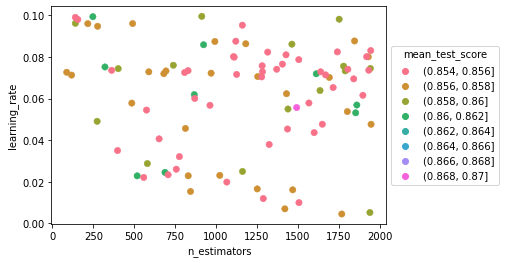

In [431]:
import seaborn as sns

df_tuning = pd.DataFrame(
    {
        "n_estimators": cv_results["n_estimators"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.854245, 0.87, 9)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df_tuning,
    x="n_estimators",
    y="learning_rate",
    hue="score_bin",
    s=40,
    color="k",
    edgecolor=None,
)
#ax.set_xscale("log")
#ax.set_yscale("log")

_ = ax.legend(title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5))

In [414]:
X = data.iloc[:].values
y = target.iloc[:].values

In [415]:
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                unknown_value=-1), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [416]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

train_scores_ss, test_scores_ss = validation_curve(classifier_ss, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)
train_scores_lrss, test_scores_lrss = validation_curve(classifier_lrss, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)


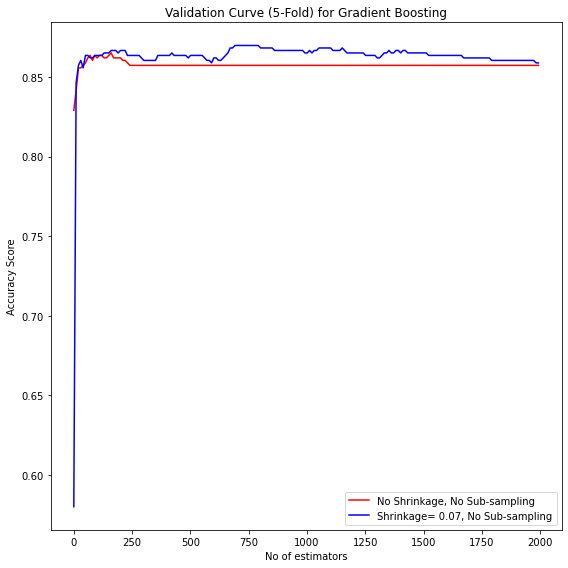

Wall time: 35min 33s


In [420]:
%%time
# Create range of values for the hyperparameter
param_range= np.arange(1, 2001, 10)
# Calculate accuracy on training and test data set through cross validation (on entire dataset, since sample size is small)
classifier = GradientBoostingClassifier(loss='deviance', learning_rate=1, subsample=1.0, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier.fit(X_train, y_train)
classifier_lr = GradientBoostingClassifier(loss='deviance', learning_rate=0.07, subsample=1.0, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier_lr.fit(X_train, y_train)
#classifier_ss = GradientBoostingClassifier(loss='deviance', learning_rate=1, subsample=0.5, max_depth=6, max_leaf_nodes=16, random_state=0,)
#classifier_ss.fit(X_train, y_train)
#classifier_lrss = GradientBoostingClassifier(loss='deviance', learning_rate=0.5, subsample=0.5, max_depth=6, max_leaf_nodes=16, random_state=0,)
#classifier_lrss.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
train_scores, test_scores = validation_curve(classifier, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)
train_scores_lr, test_scores_lr = validation_curve(classifier_lr, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
test_mean_lr = np.mean(test_scores_lr, axis=1)
test_std_lr = np.std(test_scores_lr, axis=1)
#test_mean_ss = np.mean(test_scores_ss, axis=1)
#test_std_ss = np.std(test_scores_ss, axis=1)
#test_mean_lrss = np.mean(test_scores_lrss, axis=1)
#test_std_lrss = np.std(test_scores_lrss, axis=1)

plt.subplots(1, figsize=(8,8))
plt.plot(param_range, test_mean, label="No Shrinkage, No Sub-sampling", color="red")
plt.plot(param_range, test_mean_lr, label="Shrinkage= 0.07, No Sub-sampling",color="blue")
#plt.plot(param_range, test_mean_ss, label="No Shrinkage, Sub-sampling=0.5",color="green")
#plt.plot(param_range, test_mean_lrss, label="Shrinkage=0.5, Sub-sampling=0.5",color="black")

#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
#plt.fill_between(param_range, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, color="gainsboro")
#plt.fill_between(param_range, test_mean_ss - test_std_ss, test_mean_ss + test_std_ss, color="gainsboro")
#plt.fill_between(param_range, test_mean_lrss - test_std_lrss, test_mean_lrss + test_std, color="gainsboro")

plt.title("Validation Curve (5-Fold) for Gradient Boosting")
plt.xlabel("No of estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [445]:
X = data.iloc[:].values
y = target.iloc[:].values

In [446]:
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                unknown_value=-1), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [447]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [468]:
%%time
# Create range of values for the hyperparameter
param_range= np.arange(0.01, 1, 0.01)
# Calculate accuracy on training and test data set through cross validation (on entire dataset, since sample size is small)
classifier_ssf = GradientBoostingClassifier(loss='deviance', n_estimators= 800, learning_rate= 0.07, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier_ssf.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
train_scores_ssf, test_scores_ssf = validation_curve(classifier_ssf, X_train, y_train, 
                                             param_name="subsample", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)
train_mean_ssf = np.mean(train_scores_ssf, axis=1)
train_std_ssf = np.std(train_scores_ssf, axis=1)
test_mean_ssf = np.mean(test_scores_ssf, axis=1)
test_std_ssf = np.std(test_scores_ssf, axis=1)

Wall time: 5min 56s


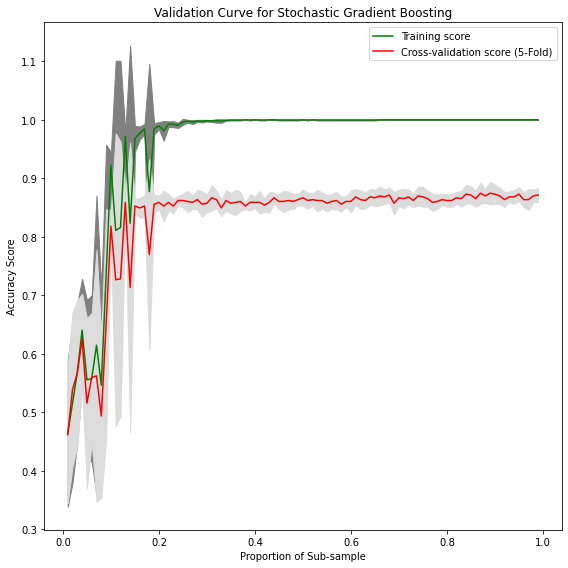

In [469]:
plt.subplots(1, figsize=(8,8))
plt.plot(param_range, train_mean_ssf, label="Training score", color="green")
plt.plot(param_range, test_mean_ssf, label="Cross-validation score (5-Fold)", color="red")
plt.fill_between(param_range, train_mean_ssf - train_std_ssf, train_mean_ssf + train_std_ssf, color="gray")
plt.fill_between(param_range, test_mean_ssf - test_std_ssf, test_mean_ssf + test_std_ssf, color="gainsboro")
plt.title("Validation Curve for Stochastic Gradient Boosting")
plt.xlabel("Proportion of Sub-sample")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [479]:
X = data.iloc[:].values
y = target.iloc[:].values

In [480]:
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                unknown_value=-1), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [481]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

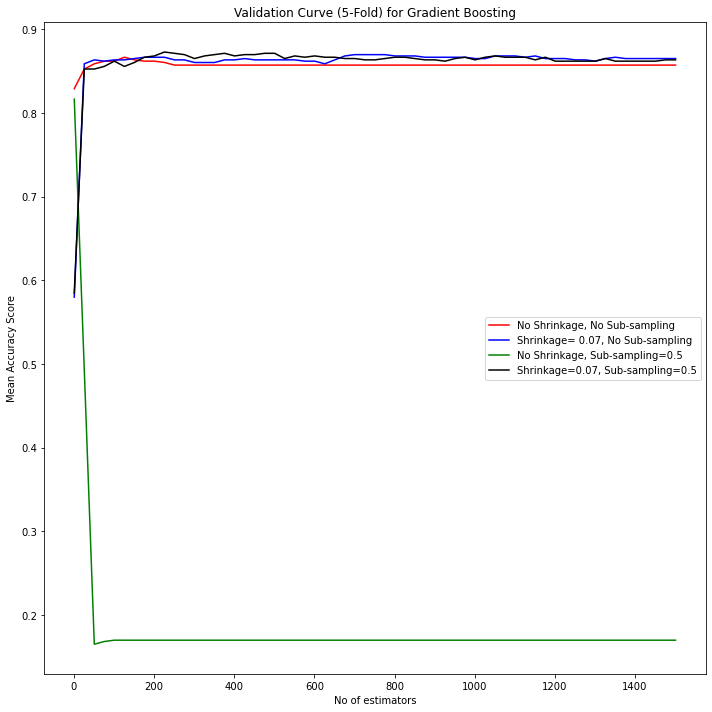

Wall time: 15min 22s


In [509]:
%%time
# Create range of values for the hyperparameter
param_range= np.arange(1, 1502, 25)
# Calculate accuracy on training and test data set through cross validation (on entire dataset, since sample size is small)
classifier = GradientBoostingClassifier(loss='deviance', learning_rate=1, subsample=1.0, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier.fit(X_train, y_train)
classifier_lr = GradientBoostingClassifier(loss='deviance', learning_rate=0.07, subsample=1.0, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier_lr.fit(X_train, y_train)
classifier_ss = GradientBoostingClassifier(loss='deviance', learning_rate=1, subsample=0.5, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier_ss.fit(X_train, y_train)
classifier_lrss = GradientBoostingClassifier(loss='deviance', learning_rate=0.07, subsample=0.5, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier_lrss.fit(X_train, y_train)

train_scores, test_scores = validation_curve(classifier, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)
train_scores_lr, test_scores_lr = validation_curve(classifier_lr, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)
train_scores_ss, test_scores_ss = validation_curve(classifier_ss, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)
train_scores_lrss, test_scores_lrss = validation_curve(classifier_lrss, X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, 
                                             cv=5, scoring="accuracy", n_jobs=-1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
test_mean_lr = np.mean(test_scores_lr, axis=1)
test_std_lr = np.std(test_scores_lr, axis=1)
test_mean_ss = np.mean(test_scores_ss, axis=1)
test_std_ss = np.std(test_scores_ss, axis=1)
test_mean_lrss = np.mean(test_scores_lrss, axis=1)
test_std_lrss = np.std(test_scores_lrss, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(param_range, test_mean, label="No Shrinkage, No Sub-sampling", color="red")
plt.plot(param_range, test_mean_lr, label="Shrinkage= 0.07, No Sub-sampling",color="blue")
plt.plot(param_range, test_mean_ss, label="No Shrinkage, Sub-sampling=0.5",color="green")
plt.plot(param_range, test_mean_lrss, label="Shrinkage=0.07, Sub-sampling=0.5",color="black")

#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
#plt.fill_between(param_range, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, color="gainsboro")
#plt.fill_between(param_range, test_mean_ss - test_std_ss, test_mean_ss + test_std_ss, color="gainsboro")
#plt.fill_between(param_range, test_mean_lrss - test_std_lrss, test_mean_lrss + test_std, color="gainsboro")

plt.title("Validation Curve (5-Fold) for Gradient Boosting")
plt.xlabel("No of estimators")
plt.ylabel("Mean Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

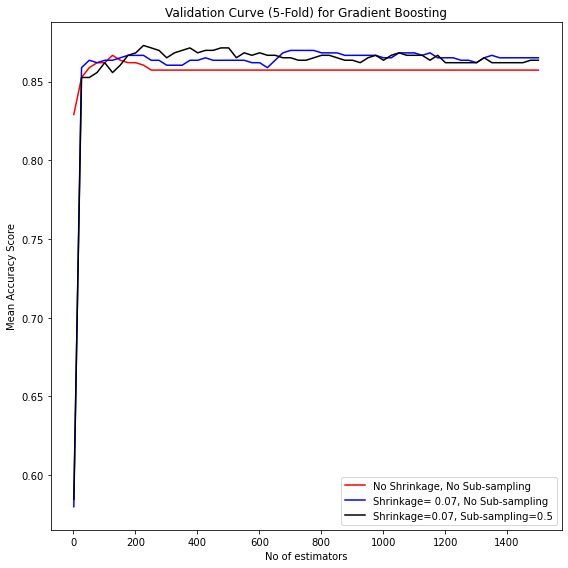

In [512]:
plt.subplots(1, figsize=(8,8))
plt.plot(param_range, test_mean, label="No Shrinkage, No Sub-sampling", color="red")
plt.plot(param_range, test_mean_lr, label="Shrinkage= 0.07, No Sub-sampling",color="blue")
#plt.plot(param_range, test_mean_ss, label="No Shrinkage, Sub-sampling=0.5",color="green")
plt.plot(param_range, test_mean_lrss, label="Shrinkage=0.07, Sub-sampling=0.5",color="black")

#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
#plt.fill_between(param_range, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, color="gainsboro")
#plt.fill_between(param_range, test_mean_ss - test_std_ss, test_mean_ss + test_std_ss, color="gainsboro")
#plt.fill_between(param_range, test_mean_lrss - test_std_lrss, test_mean_lrss + test_std, color="gainsboro")

plt.title("Validation Curve (5-Fold) for Gradient Boosting")
plt.xlabel("No of estimators")
plt.ylabel("Mean Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

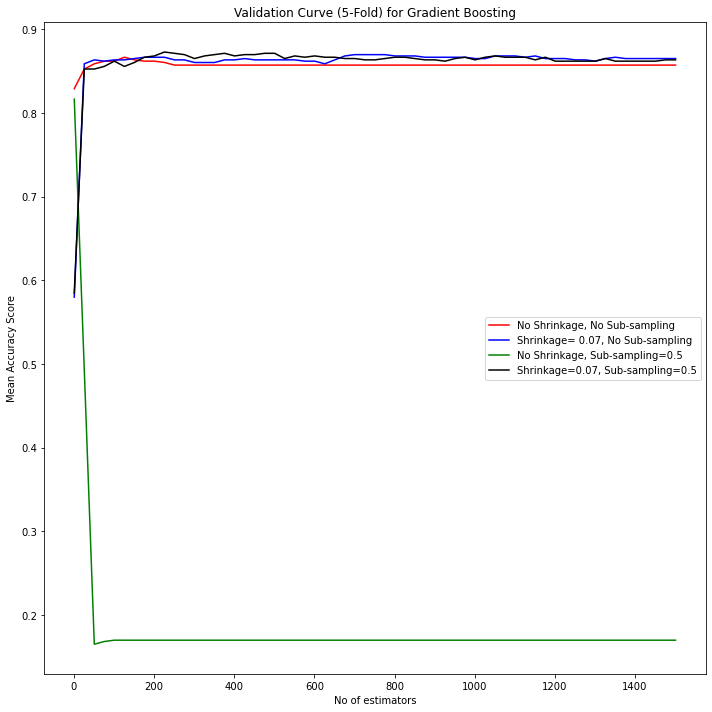

Wall time: 15min 22s


In [509]:

# Create range of values for the hyperparameter
param_range= np.arange(1, 102, 50)
# Calculate accuracy on training and test data set through cross validation (on entire dataset, since sample size is small)
for i in classifier = GradientBoostingClassifier(loss='deviance', learning_rate=1, subsample=1.0, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier.fit(X_train, y_train)
classifier_lr = GradientBoostingClassifier(loss='deviance', learning_rate=0.07, subsample=1.0, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier_lr.fit(X_train, y_train)
classifier_ss = GradientBoostingClassifier(loss='deviance', learning_rate=1, subsample=0.5, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier_ss.fit(X_train, y_train)
classifier_lrss = GradientBoostingClassifier(loss='deviance', learning_rate=0.07, subsample=0.5, max_depth=6, max_leaf_nodes=16, random_state=0,)
classifier_lrss.fit(X_train, y_train)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
test_mean_lr = np.mean(test_scores_lr, axis=1)
test_std_lr = np.std(test_scores_lr, axis=1)
test_mean_ss = np.mean(test_scores_ss, axis=1)
test_std_ss = np.std(test_scores_ss, axis=1)
test_mean_lrss = np.mean(test_scores_lrss, axis=1)
test_std_lrss = np.std(test_scores_lrss, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(param_range, test_mean, label="No Shrinkage, No Sub-sampling", color="red")
plt.plot(param_range, test_mean_lr, label="Shrinkage= 0.07, No Sub-sampling",color="blue")
plt.plot(param_range, test_mean_ss, label="No Shrinkage, Sub-sampling=0.5",color="green")
plt.plot(param_range, test_mean_lrss, label="Shrinkage=0.07, Sub-sampling=0.5",color="black")

#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
#plt.fill_between(param_range, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, color="gainsboro")
#plt.fill_between(param_range, test_mean_ss - test_std_ss, test_mean_ss + test_std_ss, color="gainsboro")
#plt.fill_between(param_range, test_mean_lrss - test_std_lrss, test_mean_lrss + test_std, color="gainsboro")

plt.title("Validation Curve (5-Fold) for Gradient Boosting")
plt.xlabel("No of estimators")
plt.ylabel("Mean Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
%%time
results_gbtsd=[]
for i in range (1, 100, 10):
    classifier = GradientBoostingClassifier(loss='deviance',
                                            n_estimators=i, learning_rate=0.07, max_depth=6, max_leaf_nodes=16, subsample=1.0, random_state=0,)
    classifier.fit(X_train, y_train)
    #y_pred = classifier.predict(X_test)
    #accuracy_score(y_test, y_pred)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, 
                                 cv = 7, n_jobs=8)
    results_gbtd.append(accuracies)
    print(accuracies)

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.24.2'

# Classification Problem on Urban Tree Dataset

## PreProcessing

### Importing the libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, roc_curve, auc,confusion_matrix, RocCurveDisplay

### Importing the Data set, Cleaning Data and Handling Missing Values

In [23]:
df = pd.read_csv('sgl-arbres-urbains-wgs84.csv')

In [24]:
df= df.drop(["ID_ARBRE", "commune", "controle", "insecte_collet", "insecte_tronc", "insecte_houppier","circonference (en cm)", "observation_collet", "observation_tronc", "observation_houppier"], axis=1 )
#Handling Missing Values
mode_cote_voirie=df.cote_voirie.mode()[0]
mode_espece_arbre=df.espece_arbre.mode()[0]
mode_situation=df.situation.mode()[0]
mode_plaie_collet=df.plaie_collet.mode()[0]
mode_champignon_tronc=df.champignon_tronc.mode()[0]
mode_fissure_tronc=df.fissure_tronc.mode()[0]
mode_rejet_tronc=df.rejet_tronc.mode()[0]
mode_plaie_tronc=df.plaie_tronc.mode()[0]
mode_champignon_houppier=df.champignon_houppier.mode()[0]
mode_fissure_houppier=df.fissure_houppier.mode()[0]
mode_ecorce_incluse_houppier=df.ecorce_incluse_houppier.mode()[0]
mode_bois_mort_houppier=df.bois_mort_houppier.mode()[0]
mode_plaie_houppier=df.plaie_houppier.mode()[0]
mode_contrainte=df.contrainte.mode()[0]
mode_classification_diagnostic=df.classification_diagnostic.mode()[0]
median_esperance_maintien=df.esperance_maintien.median()

df=df.fillna({"cote_voirie": mode_cote_voirie, "espece_arbre": mode_espece_arbre, "situation": mode_situation,
            "plaie_collet": mode_plaie_collet, "champignon_tronc": mode_champignon_tronc,
            "fissure_tronc": mode_fissure_tronc, "rejet_tronc": mode_rejet_tronc, "plaie_tronc": mode_plaie_tronc, 
              "champignon_houppier": mode_champignon_houppier, "fissure_houppier":mode_fissure_houppier, "ecorce_incluse_houppier": mode_ecorce_incluse_houppier,
            "bois_mort_houppier": mode_bois_mort_houppier, "plaie_houppier": mode_plaie_houppier, "contrainte": mode_contrainte,
            "classification_diagnostic": mode_classification_diagnostic, "esperance_maintien": median_esperance_maintien})

In [25]:
#define function to swap columns so that all numerical data will be in the end columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    a, b = col_list.index(col1), col_list.index(col2)
    col_list[b], col_list[a] = col_list[a], col_list[b]
    df = df[col_list]
    return df

#swaping columns
df = swap_columns(df, 'matricule_arbre', 'contrainte')
df = swap_columns(df, 'surf_permeable', 'plaie_houppier')
df = swap_columns(df, 'date_plantation', 'bois_mort_houppier')
df = swap_columns(df, 'hauteur', 'ecorce_incluse_houppier')
df = swap_columns(df, 'diametre', 'fissure_houppier')


In [26]:
target_name = "classification_diagnostic"
target = df[target_name]
data = df.drop(columns=[target_name])

In [27]:
X = data.iloc[:].values
y = target.iloc[:].values

In [28]:
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                unknown_value=-1), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate, validation_curve
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(loss='deviance',
                                            n_estimators=50, learning_rate=0.07, max_depth=6, max_leaf_nodes=16, subsample=1.0, random_state=0,)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8873239436619719

In [33]:
def get_properties_model(model):   
  return [i for i in model.__dict__ if i.endswith("_")] 

get_properties_model(classifier)

['n_features_in_',
 'n_features_',
 'classes_',
 'n_classes_',
 'loss_',
 'max_features_',
 'init_',
 'estimators_',
 'train_score_',
 'n_estimators_']

In [34]:
dict= classifier.__dict__

In [35]:
dict['loss_']

In [36]:
from sklearn.metrics import log_loss

In [41]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 3, 1, 0,
       1, 1, 4, 3, 1, 0, 1, 0, 0, 1, 4, 1, 0, 4, 1, 3, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0])

# Classification Problem on Urban Tree Dataset

## PreProcessing

### Importing the libraries